In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import pandas as pd

pipeline_1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

pipeline_2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

In [4]:
splits = {'train': 'sent_train.csv', 'validation': 'sent_valid.csv'}
df = pd.read_csv("hf://datasets/zeroshot/twitter-financial-news-sentiment/" + splits["train"])
df_validation = pd.read_csv("hf://datasets/zeroshot/twitter-financial-news-sentiment/" + splits["validation"])

splits = {'train': 'data/train-00000-of-00001.parquet', 'validation': 'data/validation-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df2 = pd.read_parquet("hf://datasets/google-research-datasets/poem_sentiment/" + splits["train"])
df2_validation = pd.read_parquet("hf://datasets/google-research-datasets/poem_sentiment/" + splits["validation"])

# Rename 'verse_text' to 'text' for consistency
df2 = df2.rename(columns={'verse_text': 'text'})
df2_validation = df2_validation.rename(columns={'verse_text': 'text'})

C:\Users\phcol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df.head(5)

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


In [6]:
df2.head()

,id,text,label
0,0,with pale blue berries. in these peaceful shad...,1
1,1,"it flows so long as falls the rain,",2
2,2,"and that is why, the lonesome day,",0
3,3,"when i peruse the conquered fame of heroes, an...",3
4,4,of inward strife for truth and liberty.,3


In [7]:
from sklearn.metrics import classification_report

pipeline_1.fit(df['text'], df['label'])
y_pred = pipeline_1.predict(df_validation['text'])
report = classification_report(df_validation['label'], y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.44      0.56       347
           1       0.77      0.56      0.65       475
           2       0.81      0.96      0.88      1566

    accuracy                           0.80      2388
   macro avg       0.79      0.65      0.70      2388
weighted avg       0.80      0.80      0.79      2388



In [9]:
pipeline_2.fit(df2['text'], df2['label'])
y_pred = pipeline_2.predict(df2_validation['text'])
report = classification_report(df2_validation['label'], y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       1.00      0.12      0.21        17
           2       0.67      1.00      0.80        69

    accuracy                           0.68       105
   macro avg       0.56      0.37      0.34       105
weighted avg       0.60      0.68      0.56       105



C:\Users\phcol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\phcol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\phcol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_clas

In [10]:
import numpy as np

# Extract the vocabulary and the classifier from the pipeline
vocab = pipeline_1.named_steps['tfidf'].vocabulary_
clf = pipeline_1.named_steps['clf']

# Get the feature names (words) from the TfidfVectorizer
feature_names = np.array(pipeline_1.named_steps['tfidf'].get_feature_names_out())
# Calculate predict_proba for each word
probabilities = pipeline_1.predict_proba(feature_names)

# Create a dataframe with words and their probabilities
proba_df_1 = pd.DataFrame(probabilities, index=feature_names, columns=clf.classes_)
proba_df_1.rename(columns={2 : 'neutral', 1 : 'positive', 0 : 'negative'}, inplace=True)
proba_df_1 = proba_df_1.sort_values(by='positive', ascending=False)

In [11]:
# Extract the vocabulary and the classifier from the pipeline
vocab = pipeline_2.named_steps['tfidf'].vocabulary_
clf = pipeline_2.named_steps['clf']

# Get the feature names (words) from the TfidfVectorizer
feature_names = np.array(pipeline_2.named_steps['tfidf'].get_feature_names_out())
# Calculate predict_proba for each word
probabilities = pipeline_2.predict_proba(feature_names)

# Create a dataframe with words and their probabilities
proba_df_2 = pd.DataFrame(probabilities, index=feature_names, columns=clf.classes_)
proba_df_2.rename(columns={3:'Mixed feelings', 2 : 'no impact', 1 : 'positive', 0 : 'negative'}, inplace=True)
proba_df_2 = proba_df_2.sort_values(by='positive', ascending=False)

In [12]:
proba_df_1.head(5), proba_df_2.head(5)

(         negative  positive   neutral
 up       0.001052  0.987359  0.011589
 raised   0.003612  0.951590  0.044798
 bullish  0.017384  0.949131  0.033485
 higher   0.016610  0.939654  0.043735
 pre      0.067523  0.906691  0.025786,
        negative  positive  no impact  Mixed feelings
 sweet  0.103471  0.633100   0.210999        0.052430
 heart  0.194742  0.516697   0.220363        0.068198
 of     0.206797  0.461277   0.241036        0.090890
 thy    0.203189  0.426228   0.324121        0.046462
 her    0.138700  0.419536   0.365043        0.076722)

In [13]:
proba_df_1.tail(5), proba_df_2.tail(5)

(                negative  positive   neutral
 lower           0.957554  0.006227  0.036219
 marketscreener  0.004635  0.005764  0.989602
 declares        0.003527  0.002636  0.993838
 down            0.980318  0.001567  0.018115
 misses          0.771710  0.000482  0.227808,
       negative  positive  no impact  Mixed feelings
 then  0.088621  0.055498   0.826779        0.029102
 it    0.113117  0.048546   0.821852        0.016485
 have  0.069814  0.047583   0.857429        0.025174
 not   0.095223  0.040933   0.836159        0.027685
 you   0.053520  0.036488   0.874202        0.035790)

In [14]:
#from sklearn.model_selection import learning_curve

def learning_curve(pipeline, train_df, test_df, cv, train_sizes):
    from tqdm import tqdm
    def get_score(pipeline, train_df, test_df):
        X = train_df['text']
        y = train_df['label']
        pipeline.fit(X, y)
        train_score = pipeline.score(X, y)
        test_score = pipeline.score(test_df['text'], test_df['label'])
        return train_score, test_score
    
    all_train_scores = []
    all_test_scores = []
    all_train_sizes = []
    for train_size in tqdm(train_sizes):
        train_scores = []
        test_scores = []
        train_sizes = []
        for i in range(cv):
            # Sample the training data
            train_df_ = train_df.sample(frac=train_size, random_state=i)
            train_score, test_score = get_score(pipeline, train_df_, test_df)
            train_scores.append(train_score)
            test_scores.append(test_score)
            train_sizes.append(len(train_df_))

        all_train_scores.append(train_scores)
        all_test_scores.append(test_scores)
        all_train_sizes.append(train_sizes)
    return np.array(all_train_sizes), np.array(all_train_scores), np.array(all_test_scores)


# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    pipeline_1, df, df2_validation, cv=5, train_sizes=np.logspace(-2, 0, 10, base=10)
)


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


In [15]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_sizes = np.mean(train_sizes, axis=1)

test_scores_std

array([0.        , 0.        , 0.        , 0.        , 0.00380952,
       0.01110658, 0.00712697, 0.00761905, 0.00933139, 0.        ])

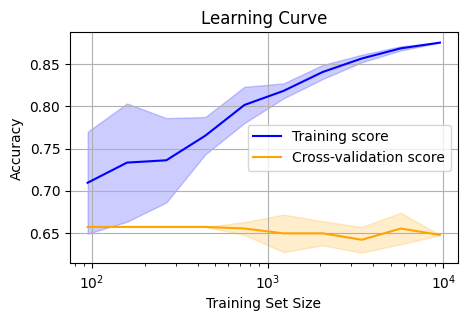

In [16]:
# Plot the learning curve
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_scores_mean - 2*train_scores_std, train_scores_mean + 2*train_scores_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='orange')
plt.fill_between(train_sizes, test_scores_mean - 2*test_scores_std, test_scores_mean + 2*test_scores_std, color='orange', alpha=0.2)

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.semilogx()


plt.grid()
plt.show()